In [1]:
import os
from pathlib import Path

import librosa
import librosa.display
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

In [2]:
call_path = Path(os.environ['DATA_DIR']) / 'calls' / 'apus_apus' / '103552.wav'

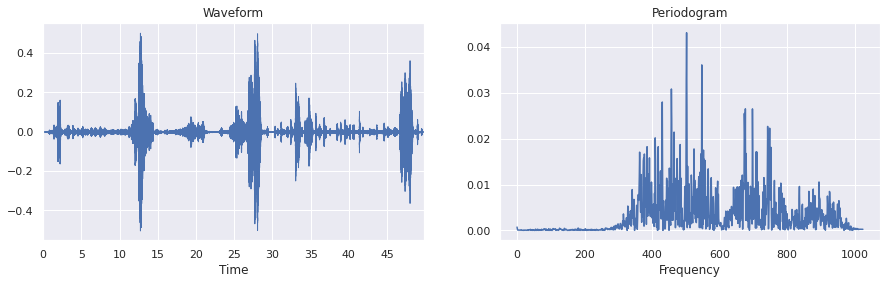

In [3]:
call, sr = librosa.load(call_path)

# Trim silent edges
call, _ = librosa.effects.trim(call)

# Split signal into 2048 windows and compute STFT only for the first window
n_fft = 2048
D = np.abs(librosa.stft(call[:n_fft], n_fft=n_fft, hop_length=n_fft+1))

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
librosa.display.waveplot(call, sr=sr)
plt.title('Waveform')

plt.subplot(1, 2, 2)
plt.plot(D)
plt.xlabel('Frequency')
plt.title('Periodogram')

plt.show()

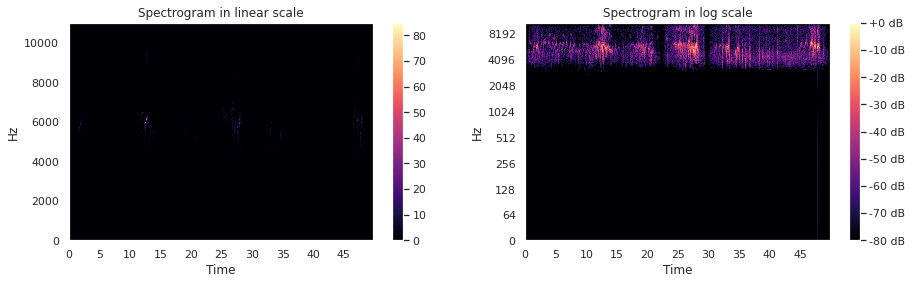

In [4]:
# Spectrogram is informative to the human eye when presented in log scale
n_fft = 2048
hop_length = 512
D = np.abs(librosa.stft(call, n_fft=n_fft, hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()
plt.title('Spectrogram in linear scale')

plt.subplot(1, 2, 2)
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram in log scale')

plt.show()

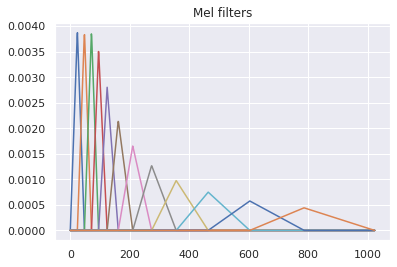

In [5]:
# Compute Mel filters to transform spectrogram into Mel spectrogram
# Every filter transforms from Hertz scale into Mel scale
n_fft = 2048
n_mels = 12
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

for m in mel:
    plt.plot(m)
plt.title('Mel filters')
plt.show()

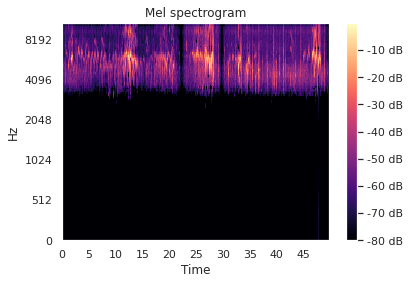

In [6]:
n_fft = 2048
hop_length = 512
n_mels = 128
S = librosa.feature.melspectrogram(call, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

In [7]:
n_fft = 2048
hop_length = 512
n_mels = 10

S = librosa.feature.melspectrogram(call, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
fft_windows = librosa.stft(call, n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(fft_windows) ** 2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()